In [1]:
import process as mtd
import mtdProcess as mp
from sigProcess import cftiming as timer
#from jupyterthemes import jtplot
#jtplot.style()
file = 'data/Jan29/Jan29_FBKV1_HV160-ch2_HP_HG_DiscriOff_TrigCh1_HV300_minus35mV_VertScale_100mV/Jan29_FBKV1_HV160-ch2_HP_HG_DiscriOff_TrigCh1_HV300_minus35mV_VertScale_100mV_0.hdf5'
process = mtd.process('test')
process.source([file])
timer = timer()

jitter = mp.jitter_analyzer()
charge = mp.charge_analyzer(channel= 2, transimp = 4400, bkg_range=[0,400])
process.path(charge+jitter)

100%|██████████| 2000/2000 [00:00<00:00, 43039.47it/s]
/home/tabris/etroc/mtdProj/mtdProcess.py:81: RuntimeWarning: Mean of empty slice.
  self.charge_mean = np.array(self.chg).mean()
/home/tabris/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.
/home/tabris/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/tabris/.local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tabris/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 2000/2000 [00:00<00:00, 43018.06it/s]
No handles with labels fo

NameError: name 'name' is not defined

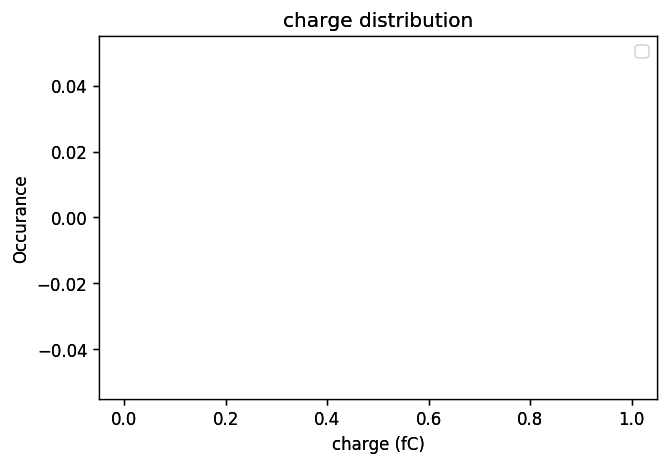

In [2]:
process.run()

In [3]:
charge+jitter+summ